In [ ]:
# Diabetes
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

# Load diabetes dataset
file_path_diabetes = 'diabetes.csv'
diabetes_data = pd.read_csv(file_path_diabetes)

# Check for null values
print("Checking for null values in the dataset:")
null_values = diabetes_data.isnull().sum()
print(null_values)

# If there are any null values, handle them (e.g., fill with the mean of the column)
if null_values.any():
    imputer = SimpleImputer(strategy='mean')
    diabetes_data = pd.D

# Define features and labels
X_diabetes = diabetes_data.drop(columns='Outcome')
y_diabetes = diabetes_data['Outcome']

# Standardized feature
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)

# Using Gaussian naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions in the test set
y_pred_diabetes = nb_model.predict(X_test)
y_prob_diabetes = nb_model.predict_proba(X_test)[:, 1]

# Evaluation model
accuracy = accuracy_score(y_test, y_pred_diabetes)
precision = precision_score(y_test, y_pred_diabetes)
recall = recall_score(y_test, y_pred_diabetes)
f1 = f1_score(y_test, y_pred_diabetes)
roc_auc = roc_auc_score(y_test, y_prob_diabetes)

# Display evaluation indicators
evaluation_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC Score': roc_auc
}

# Print evaluation indicators
print("Diabetes Prediction Model Evaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")

# Load sleep health and lifestyle datasets
file_path_sleep = 'Sleep_health_and_lifestyle_dataset.csv'
sleep_data = pd.read_csv(file_path_sleep)

# Create a feature map, where you need to hypothesize and create features to match the diabetes dataset

sleep_data['Glucose'] = 0  # Assumed default
# The Blood Pressure column was split into systolic and diastolic blood pressure
sleep_data[['Systolic_BP', 'Diastolic_BP']] = sleep_data['Blood Pressure'].str.split('/', expand=True).astype(float)
sleep_data['BloodPressure'] = sleep_data['Systolic_BP']  # Use Systolic_BP as the BloodPressure value
sleep_data['SkinThickness'] = 0  # Assumed default
sleep_data['Insulin'] = 0  # Assumed default
sleep_data['BMI'] = sleep_data['BMI Category'].map({'Underweight': 18.5, 'Normal weight': 22.5, 'Overweight': 27.5, 'Obesity': 32.5})
sleep_data['DiabetesPedigreeFunction'] = 0  # Assumed default
sleep_data['Pregnancies'] = 0  # Assumed default

# Select these generated features
X_sleep = sleep_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Use the mean to fill in missing values
imputer = SimpleImputer(strategy='mean')
X_sleep_imputed = imputer.fit_transform(X_sleep)

# Standardized feature
X_sleep_scaled = scaler.transform(X_sleep_imputed)

# Use a trained model to make predictions
y_prob_sleep = nb_model.predict_proba(X_sleep_scaled)[:, 1]

# Save the updated data set
sleep_data.to_csv('diabetes_probability_smartwatch.csv', index=False)


Checking for null values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Diabetes Prediction Model Evaluation Metrics:
Accuracy: 0.7662
Precision: 0.6610
Recall: 0.7091
F1 Score: 0.6842
ROC AUC Score: 0.8253


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


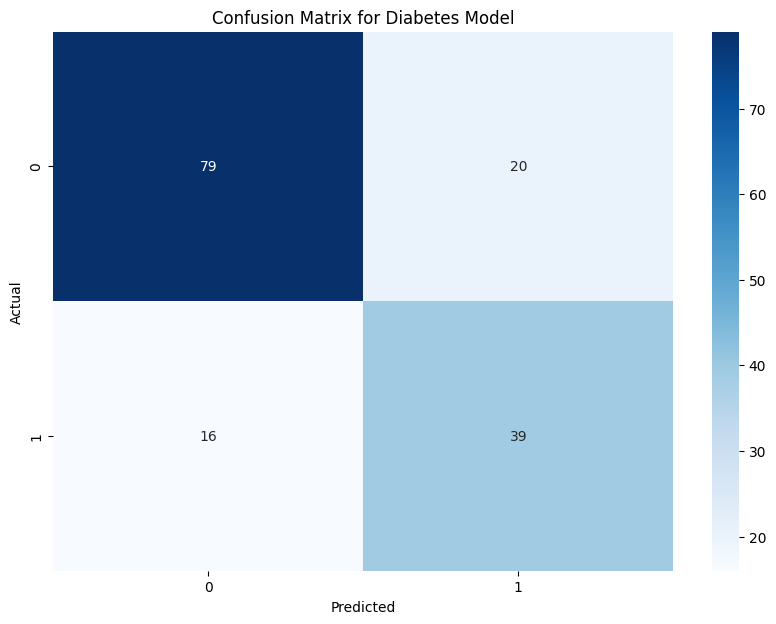

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Computational confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_diabetes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Diabetes Model')
plt.show()

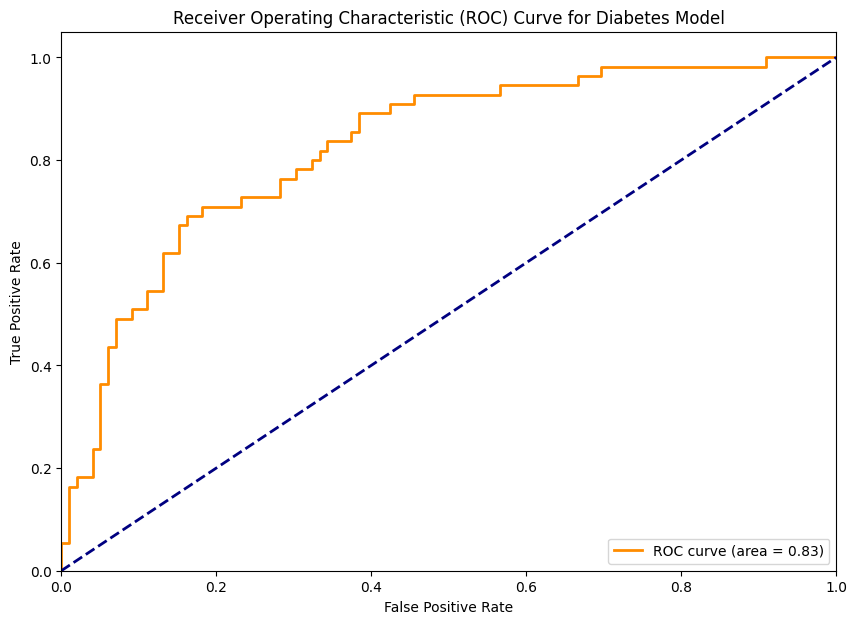

In [ ]:
#  Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_diabetes)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Diabetes Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# CPT
features = X_diabetes.columns
means = nb_model.theta_
variances = nb_model.var_

for i, feature in enumerate(features):
    print(f"Feature: {feature}")
    print(f"Mean for class 0: {means[0][i]:.2f}, Variance for class 0: {variances[0][i]:.2f}")
    print(f"Mean for class 1: {means[1][i]:.2f}, Variance for class 1: {variances[1][i]:.2f}")
    print("-" * 50)


Feature: Pregnancies
Mean for class 0: -0.18, Variance for class 0: 0.81
Mean for class 1: 0.25, Variance for class 1: 1.15
--------------------------------------------------
Feature: Glucose
Mean for class 0: -0.33, Variance for class 0: 0.66
Mean for class 1: 0.63, Variance for class 1: 1.04
--------------------------------------------------
Feature: BloodPressure
Mean for class 0: -0.04, Variance for class 0: 0.83
Mean for class 1: 0.12, Variance for class 1: 1.05
--------------------------------------------------
Feature: SkinThickness
Mean for class 0: -0.05, Variance for class 0: 0.83
Mean for class 1: 0.07, Variance for class 1: 1.12
--------------------------------------------------
Feature: Insulin
Mean for class 0: -0.07, Variance for class 0: 0.77
Mean for class 1: 0.16, Variance for class 1: 1.45
--------------------------------------------------
Feature: BMI
Mean for class 0: -0.22, Variance for class 0: 0.91
Mean for class 1: 0.41, Variance for class 1: 0.80
-------------

<ipython-input-10-76db0cb561ba>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean Difference', y='Feature', data=df_diff_sorted, palette='viridis')


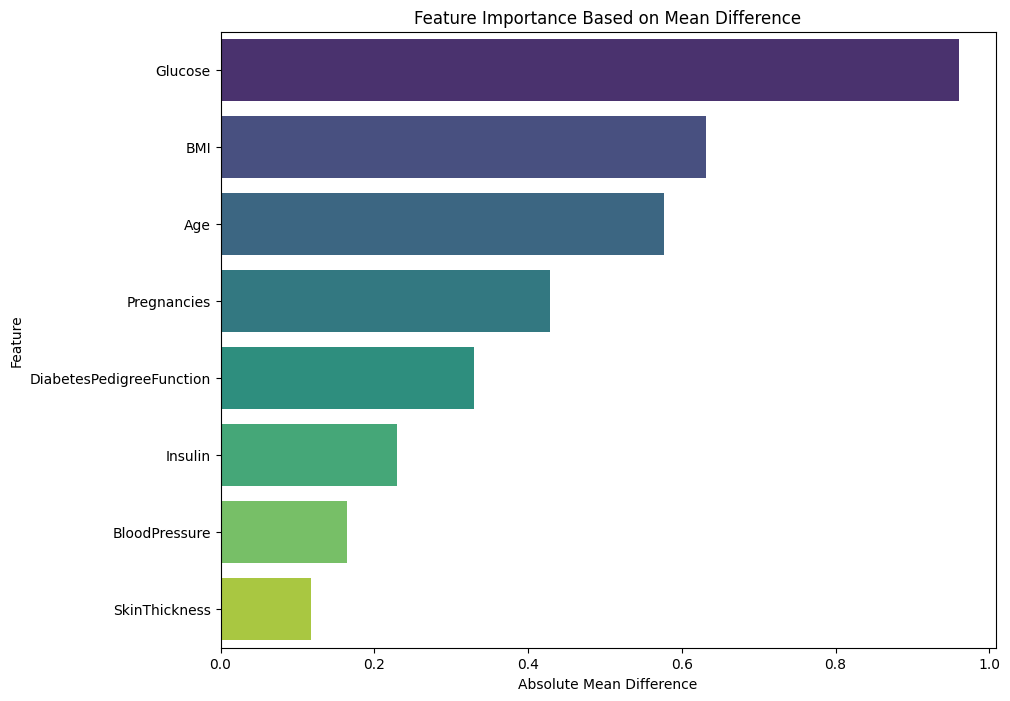

<ipython-input-10-76db0cb561ba>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variance Difference', y='Feature', data=df_diff_sorted_variance, palette='magma')


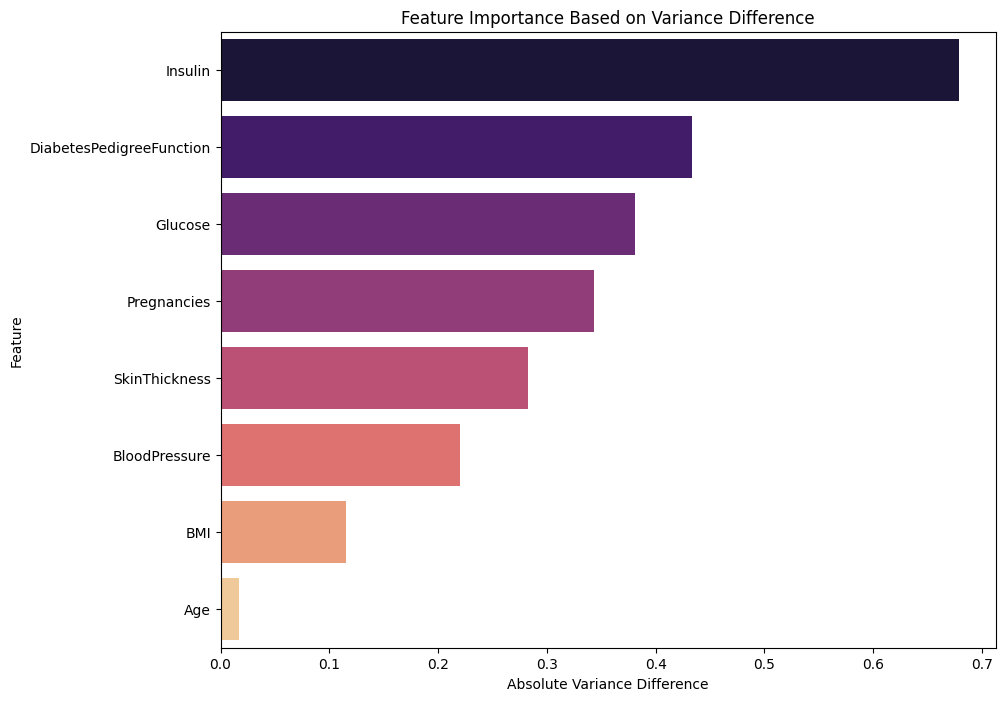

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initializes a data structure that holds differences in features, means, and variances
feature_names = []
mean_diff = []
variance_diff = []

# Go through all the features and calculate the difference between the mean and variance
for i, feature in enumerate(features):
    feature_names.append(feature)
    mean_diff.append(abs(means[0][i] - means[1][i]))  # Calculate the absolute value of the difference in the means
    variance_diff.append(abs(variances[0][i] - variances[1][i]))  # Calculate the absolute value of the variance difference

# Store the result in a DataFrame
df_diff = pd.DataFrame({
    'Feature': feature_names,
    'Mean Difference': mean_diff,
    'Variance Difference': variance_diff
})

# Sort by mean difference, showing the most important features
df_diff_sorted = df_diff.sort_values(by='Mean Difference', ascending=False)

# Importance of visual features (according to mean differences)
plt.figure(figsize=(10, 8))
sns.barplot(x='Mean Difference', y='Feature', data=df_diff_sorted, palette='viridis')
plt.title('Feature Importance Based on Mean Difference')
plt.xlabel('Absolute Mean Difference')
plt.ylabel('Feature')
plt.show()

# sorted and visualized by variance differences
df_diff_sorted_variance = df_diff.sort_values(by='Variance Difference', ascending=False)

# Importance of visual features (according to variance differences)
plt.figure(figsize=(10, 8))
sns.barplot(x='Variance Difference', y='Feature', data=df_diff_sorted_variance, palette='magma')
plt.title('Feature Importance Based on Variance Difference')
plt.xlabel('Absolute Variance Difference')
plt.ylabel('Feature')
plt.show()


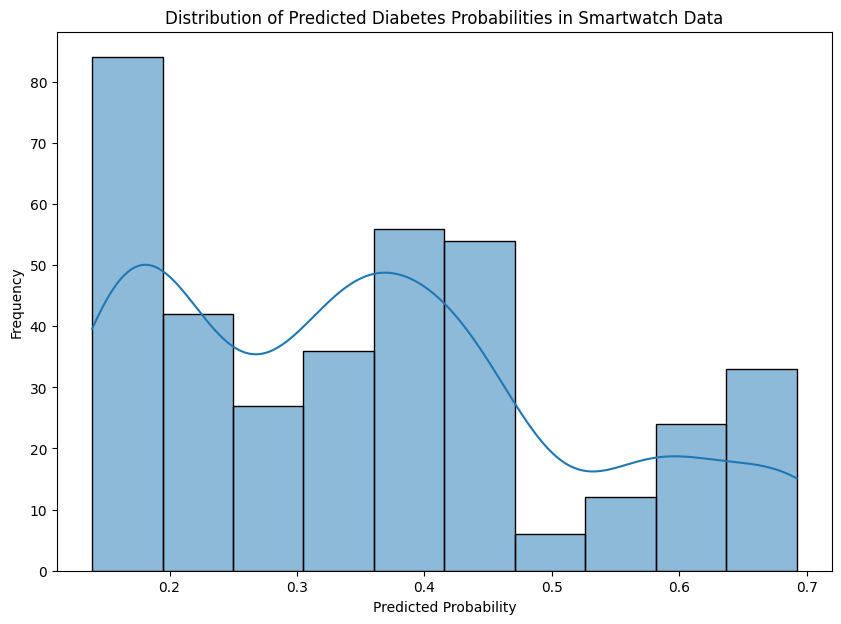

In [ ]:
# Plot the predicted probability distribution
plt.figure(figsize=(10, 7))
sns.histplot(y_prob_sleep, bins=10, kde=True)
plt.title('Distribution of Predicted Diabetes Probabilities in Smartwatch Data')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Load the diabetes data set
file_path_diabetes = 'diabetes.csv'
diabetes_data = pd.read_csv(file_path_diabetes)

# Define features and labels
X_diabetes = diabetes_data.drop(columns='Outcome')
y_diabetes = diabetes_data['Outcome']

# Fill in missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_diabetes_imputed = imputer.fit_transform(X_diabetes)

# Standardized feature
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes_imputed)

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)

# Definition model list
models = {
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(probability=True),
    "DecisionTree": DecisionTreeClassifier()
}

# Train and evaluate the model
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Print result
for model_name, metrics in results.items():
    print(f"{model_name} Model Results:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")
    print()


GaussianNB Model Results:
  Accuracy: 0.7662
  Precision: 0.6610
  Recall: 0.7091
  F1 Score: 0.6842
  ROC AUC Score: 0.8253

LogisticRegression Model Results:
  Accuracy: 0.7532
  Precision: 0.6491
  Recall: 0.6727
  F1 Score: 0.6607
  ROC AUC Score: 0.8147

LDA Model Results:
  Accuracy: 0.7597
  Precision: 0.6607
  Recall: 0.6727
  F1 Score: 0.6667
  ROC AUC Score: 0.8136

SVM Model Results:
  Accuracy: 0.7273
  Precision: 0.6327
  Recall: 0.5636
  F1 Score: 0.5962
  ROC AUC Score: 0.8046

DecisionTree Model Results:
  Accuracy: 0.7532
  Precision: 0.6349
  Recall: 0.7273
  F1 Score: 0.6780
  ROC AUC Score: 0.7475



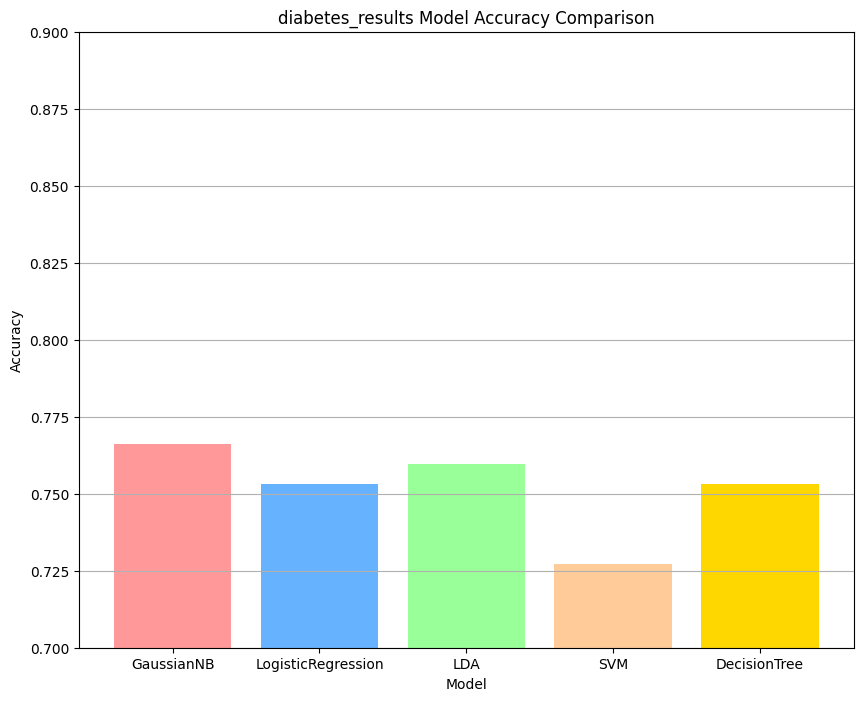

In [ ]:
import matplotlib.pyplot as plt
# The accuracy of diabetes prediction models was compared
diabetes_results = {
    "GaussianNB": results["GaussianNB"]["Accuracy"],
    "LogisticRegression": results["LogisticRegression"]["Accuracy"],
    "LDA": results["LDA"]["Accuracy"],
    "SVM": results["SVM"]["Accuracy"],
    "DecisionTree": results["DecisionTree"]["Accuracy"]
}

models = list(diabetes_results.keys())
accuracies = list(diabetes_results.values())

plt.figure(figsize=(10,8))
plt.bar(models, accuracies, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title("diabetes_results Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.70, 0.90)
plt.grid(axis='y')
plt.show()